## Predicting Honey Production

Now that you've grasped the fundamentals of linear regression, let's apply this knowledge to analyze real-world data.

Honeybees, crucial pollinators for agricultural ecosystems, face a critical situation. Media reports frequently highlight the decline in honeybee populations due to various factors. In this project, we aim to delve into this decline and explore how historical trends can offer insights into the future of honeybee populations.

The data is taken from Kaggle, which is provided along with the notebook.

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
# load the data
df = pd.read_csv("./data.csv", delimiter=";")
#print the first five rows
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])

The dataset contains honey production data spanning from 1998 to 2012. Using this historical information, we can leverage predictive modeling techniques to forecast future total production trends. Additionally, we have the flexibility to explore and predict various other properties related to honey production (which I am leaving it to you!).

In [4]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

We aggregated the data by grouping it annually and summing the honey production values across all states. This approach allowed us to obtain the total production per year for the entire country.

In [5]:
#lets create the X and y columns for prediction
X = prod_per_year["year"]
X = X.values.reshape(-1,1)
y = prod_per_year["totalprod"]

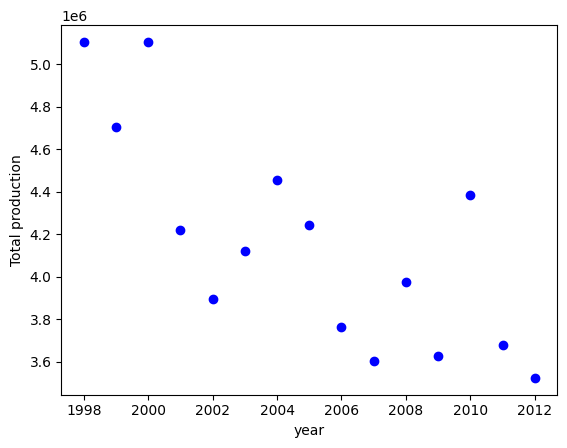

In [6]:
plt.xlabel("year")
plt.ylabel("Total production")
plt.scatter(X, y, color = "b", label = "original")
plt.show()

Can you see a vaguely linear relationship between these variables?

yes, there is a linear relationship

In [7]:
# create the linear regression model
regr = linear_model.LinearRegression()

In [8]:
# fit the data
regr.fit(X, y)

print("slope of the line: ",regr.coef_[0])
print("intercept of the line: ",regr.intercept_)

slope of the line:  -88303.18915238195
intercept of the line:  181208083.10732982


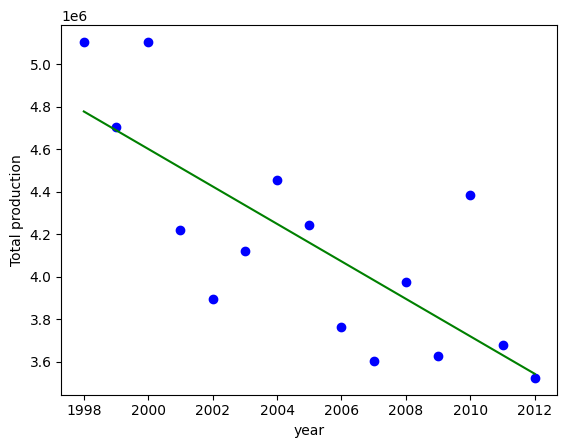

In [9]:
# prediction
y_predict = regr.predict(X)

#plot the prediction
plt.xlabel("year")
plt.ylabel("Total production")
plt.scatter(X, y, color = "b", label = "original")
plt.plot(X, y_predict, color = "g", label = "fit")
plt.show()

So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050. The code below makes a NumPy array with the numbers 1 through 10

In [10]:
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)


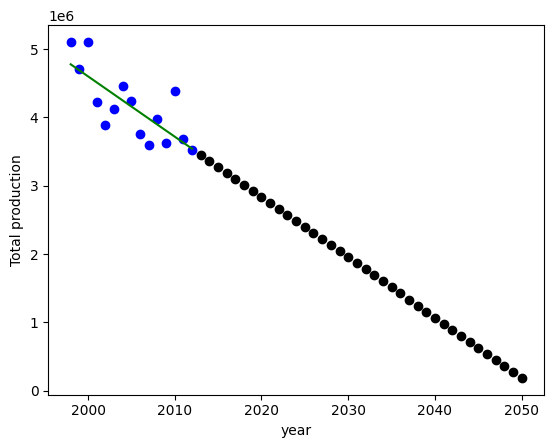

In [11]:
#predict the future total production
future_predict = regr.predict(X_future)

#plot the prediction
plt.xlabel("year")
plt.ylabel("Total production")
plt.scatter(X, y, color = "b", label = "original")
plt.plot(X, y_predict, color = "g", label = "fit")
plt.scatter(X_future, future_predict, color = "k", label = "prediction")
plt.show()

In [12]:
print(X_future[-1], future_predict[-1])

[2050] 186545.34494683146


The total production of honey seems to be declining over time. By 2050 the total production of honey reaches ~ 1.86x10^5